In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from util import *

import tensorflow as tf
from sklearn.metrics import accuracy_score

In [2]:
datapath = '/home/adityav/UCSD/Spring17/COGS260_ImageRecognition/HW3/data/iris/'
saveImagePath = '/home/adityav/UCSD/Spring17/COGS260_ImageRecognition/HW3/Images/'
trainData, testData, featureLabels = getData(datapath)

Number of training example: 	70
Number of test example: 	30 

The features in the dataset are:
['sepal Length', 'sepal Width', 'petal Length', 'petal Width'] 

Class label for Iris-setosa: 		 1
Class label for Iris-versicolor: 	 0


# Part 1_a Scatter plot against 2 features

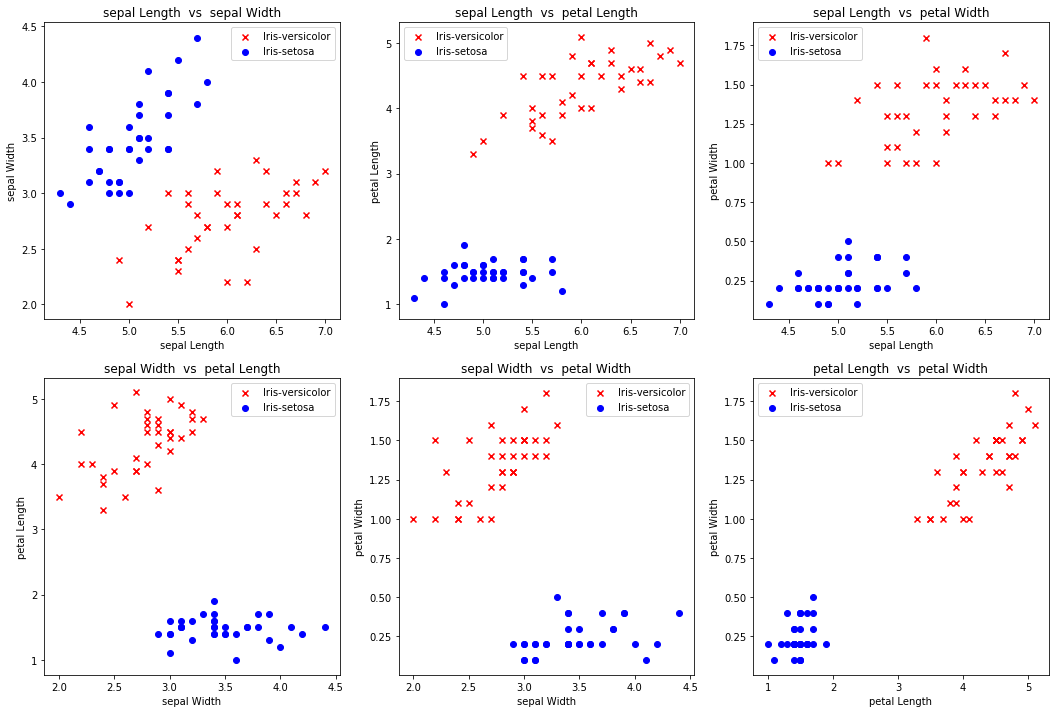

In [3]:
fig,plots = createTiles(2,3,18,12)
plotIndex = 0
numFeatures = len(featureLabels)

for i in range(numFeatures-1):
    for j in range(i+1, numFeatures):
        scatterFeatures(featureLabels, i, j, trainData, plots, plotIndex)
        plotIndex = plotIndex + 1
        
fig.savefig(saveImagePath+'1_a_FeatureSeparability.png',bbox_inches='tight')

fig

# Part 1_b 

In [9]:
# Define Model 
x = tf.placeholder(tf.float32,shape=[None,4])
y = tf.placeholder(tf.float32,shape=[None,1])

weight = tf.Variable( tf.truncated_normal([4,1],stddev=0.01) )
bias   = tf.Variable( tf.constant(0.1) )

y_pred = tf.sigmoid(tf.matmul(x,weight) + bias )


cross_entropy = -tf.reduce_mean(tf.multiply(y, tf.log(y_pred)) + tf.multiply((1-y),tf.log(1-y_pred)))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(y ,tf.cast(tf.greater_equal(y_pred,0.5),tf.float32) )
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

init = tf.global_variables_initializer()

In [10]:
trX = trainData.values[:,0:4]
trY = trainData['classLabel'].values
trY = trY.reshape([-1,1])
# Initializing the variables

trainingEpocs = 250;
train_loss = [];
train_accuracy = [];

with tf.Session() as sess:
    sess.run(init)

    for epoc in range(trainingEpocs):
        _,y_prediction, y_true, epoc_loss, epoc_accuracy, model_weight, model_bias = sess.run( [train_step,y_pred, y, cross_entropy,accuracy, weight, bias], feed_dict={x:trX,y:trY} )
        train_loss = train_loss + epoc_loss
        train_accuracy = train_accuracy + epoc_accuracy

        if(np.mod(epoc,10) == 0):
            print('Epoc:%d,\t Loss: %.2f,\tAccuracy: %.2f'%(epoc,epoc_loss,epoc_accuracy))


    print("Optimization Finished!")

Epoc:0,	 Loss: 0.70,	Accuracy: 0.50
Epoc:10,	 Loss: 0.70,	Accuracy: 0.50
Epoc:20,	 Loss: 0.70,	Accuracy: 0.50
Epoc:30,	 Loss: 0.70,	Accuracy: 0.50
Epoc:40,	 Loss: 0.69,	Accuracy: 0.50
Epoc:50,	 Loss: 0.69,	Accuracy: 0.50
Epoc:60,	 Loss: 0.69,	Accuracy: 0.50
Epoc:70,	 Loss: 0.69,	Accuracy: 0.50
Epoc:80,	 Loss: 0.69,	Accuracy: 0.50
Epoc:90,	 Loss: 0.69,	Accuracy: 0.50
Epoc:100,	 Loss: 0.68,	Accuracy: 0.50
Epoc:110,	 Loss: 0.68,	Accuracy: 0.50
Epoc:120,	 Loss: 0.68,	Accuracy: 0.50
Epoc:130,	 Loss: 0.68,	Accuracy: 0.50
Epoc:140,	 Loss: 0.68,	Accuracy: 0.50
Epoc:150,	 Loss: 0.68,	Accuracy: 0.60
Epoc:160,	 Loss: 0.68,	Accuracy: 0.73
Epoc:170,	 Loss: 0.67,	Accuracy: 0.84
Epoc:180,	 Loss: 0.67,	Accuracy: 0.93
Epoc:190,	 Loss: 0.67,	Accuracy: 0.99
Epoc:200,	 Loss: 0.67,	Accuracy: 0.99
Epoc:210,	 Loss: 0.67,	Accuracy: 1.00
Epoc:220,	 Loss: 0.67,	Accuracy: 1.00
Epoc:230,	 Loss: 0.67,	Accuracy: 1.00
Epoc:240,	 Loss: 0.67,	Accuracy: 1.00
Optimization Finished!
